In [611]:
import matplotlib.pyplot as plt
import numpy as np

In [612]:
gamma1 = gamma2 = gamma3 = gamma4 = gamma5 = 1
gamma6 = 2
eta_one = 0.05014
pikL = 1
#编队-车-坐标
x_mat = np.zeros((2, 4, 2), dtype='float')
v_mat = np.zeros((2, 4, 2), dtype='float')
r_mat = np.zeros((2, 4, 2), dtype='float')
x_list = [x_mat]
v_list = [v_mat]
xL_list = [np.zeros((2, 2), dtype='float')]
vL_list = [np.zeros((2, 2), dtype='float')]
a_mat = np.zeros((4, 4))

In [613]:
#初始化参数
a_mat[0][1] = 1
a_mat[1][0] = 1
a_mat[1][2] = 1
a_mat[2][1] = 1
a_mat[2][3] = 1
a_mat[3][2] = 1

x_mat[0][0] = (18, 1)
x_mat[0][1] = (12, 1)
x_mat[0][2] = (8, 1)
x_mat[0][3] = (0, 1)
x_mat[1][0] = (15, 3)
x_mat[1][1] = (11, 3)
x_mat[1][2] = (5, 3)
x_mat[1][3] = (0, 3)

v_mat[0][0] = (4.8, 0)
v_mat[0][1] = (5.2, 0)
v_mat[0][2] = (4.9, 0)
v_mat[0][3] = (5.1, 0)
v_mat[1][0] = (6.0, 0)
v_mat[1][1] = (6.2, 0)
v_mat[1][2] = (5.8, 0)
v_mat[1][3] = (6.1, 0)

r_mat[0][0] = (5, 0)
r_mat[0][1] = (10, 0)
r_mat[0][2] = (15, 0)
r_mat[0][3] = (20, 0)
r_mat[1][0] = (5, 0)
r_mat[1][1] = (10, 0)
r_mat[1][2] = (15, 0)
r_mat[1][3] = (20, 0)

xL_list[0][0] = (23, 1)
xL_list[0][1] = (20, 3)

vL_list[0][0] = (5.1, 0)
vL_list[0][1] = (5.8, 0)

In [614]:
times = 10
step = 1e-3

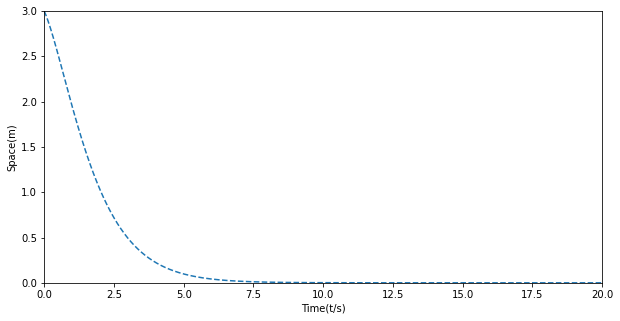

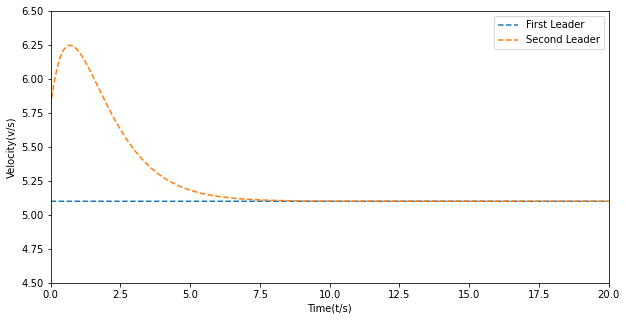

In [615]:
for t in range(int(times / step)*2):
    uL = -pikL * (gamma5 * (xL_list[-1][1] - xL_list[-1][0] - (0, 2)) + gamma6 * (vL_list[-1][1] - vL_list[-1][0]))
    xL_list.append(xL_list[-1] + vL_list[-1] * step)
    vL_mat = np.zeros((2, 2), dtype='float')
    vL_mat[0] = vL_list[-1][0]
    vL_mat[1] = vL_list[-1][1] + step * uL
    vL_list.append(vL_mat)

plt.figure(figsize=(10, 5))
plt.plot([t * step for t in range(int(times / step)*2 + 1)], [t[0][0] - t[1][0] for t in xL_list], '--')
plt.ylim((0, 3))
plt.xlim((0, 20))
plt.xlabel("Time(t/s)")
plt.ylabel("Space(m)")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot([t * step for t in range(int(times / step)*2 + 1)], [t[0][0] for t in vL_list], '--')
plt.plot([t * step for t in range(int(times / step)*2 + 1)], [t[1][0] for t in vL_list], '--')
plt.legend(["First Leader", "Second Leader"])
plt.xlabel("Time(t/s)")
plt.ylabel("Velocity(v/s)")
plt.xlim((0, 20))
plt.ylim((4.5, 6.5))
plt.show()

In [616]:
def dst(dot):
    return (dot[0] ** 2 + dot[1] ** 2) ** 0.5


t_mat = np.zeros((2, 4))
temp_list = []

In [625]:
for t in range(int(times / step),int(times / step)*2):
    v_mat_temp = np.zeros((2, 4, 2), dtype='float')
    c_mat_temp = np.zeros((2, 4, 2), dtype='float')
    x_mat_temp = np.zeros((2, 4, 2), dtype='float')
    for p in range(0, 2):
        for i in range(4):
            v_temp = np.array((0, 0), dtype="float")
            dot1 = np.array((0, 0), dtype="float")
            dot2 = np.array((0, 0), dtype="float")
            for j in range(4):
                dot1 += a_mat[i][j] * (x_list[int(t_mat[p][j])][p][j] - x_list[int(t_mat[p][i])][p][i] +
                                       v_list[int(t_mat[p][j])][p][j] -
                                       v_list[int(t_mat[p][i])][p][i])
                dot1 -= a_mat[i][j] * (x_list[-1][p][j] - x_list[-1][p][i]) + v_list[-1][p][j] - v_list[-1][p][i]
                dot2 += dot1
            u = dst(dot1) - eta_one * dst(dot2)
            if u > 0:
                for j in range(4):
                    v_temp -= a_mat[i][j] * (gamma1 * (
                            x_list[int(t_mat[p][i])][p][i] - x_list[int(t_mat[p][j])][p][j] + (
                            r_mat[p][i] - r_mat[p][j])) + gamma2 * (v_list[int(t_mat[p][i])][p][i] -
                                                                    v_list[int(t_mat[p][j])][p][j]))
                v_temp -= pikL * (gamma3 * (
                        x_list[int(t_mat[p][i])][p][i] - xL_list[int(t_mat[p][i])][p] + r_mat[p][i]) + gamma4 * (
                                          v_list[int(t_mat[p][i])][p][i] - vL_list[int(t_mat[p][i])][p]))
                t_mat[p][i] = t
            if u <= 0:
                c_mat_temp[p][i] = temp_list[-1][p][i]
            else:
                c_mat_temp[p][i] = v_temp
            v_mat_temp[p][i] = v_list[-1][p][i] + v_temp * step
            x_mat_temp[p][i] = x_list[-1][p][i] + v_list[-1][p][i] * step
    v_list.append(v_mat_temp)
    x_list.append(x_mat_temp)
    temp_list.append(c_mat_temp)

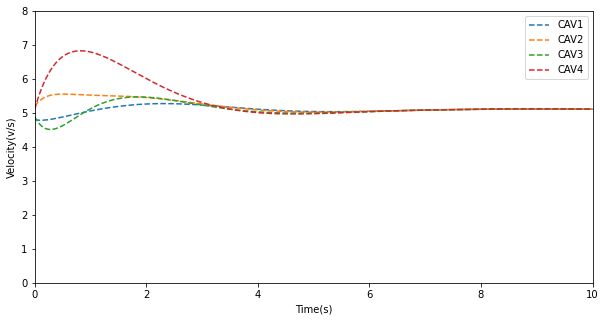

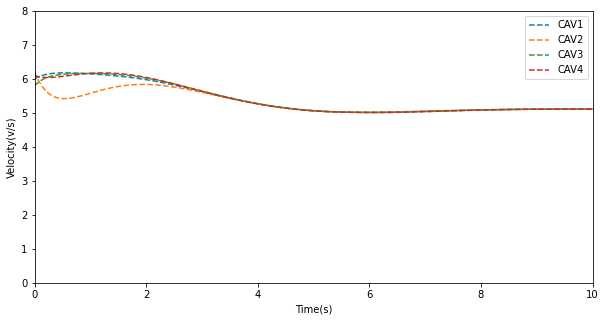

In [618]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.plot([t * step for t in range(int(times / step) + 1)], [t[0][i][0] for t in v_list], '--')
plt.ylim((0, 8))
plt.xlim((0, 10))
plt.xlabel("Time(s)")
plt.ylabel("Velocity(v/s)")
plt.legend(["CAV1", "CAV2", "CAV3", "CAV4"])
plt.show()
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.plot([t * step for t in range(int(times / step) + 1)], [t[1][i][0] for t in v_list], '--')
plt.ylim((0, 8))
plt.xlim((0, 10))
plt.xlabel("Time(s)")
plt.ylabel("Velocity(v/s)")
plt.legend(["CAV1", "CAV2", "CAV3", "CAV4"])
plt.show()

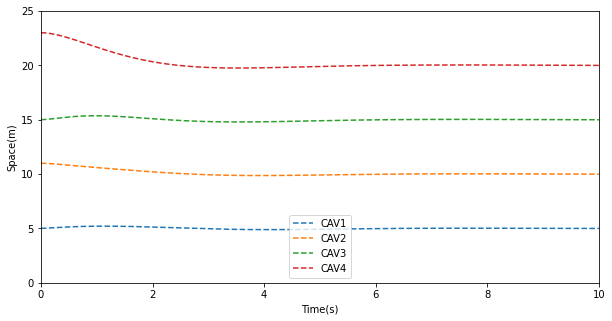

In [619]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.plot([t * step for t in range(int(times / step) + 1)], [l[0][0] - t[0][i][0] for t, l in zip(x_list, xL_list)],
             '--')
plt.xlim((0, 10))
plt.ylim((0, 25))
plt.xlabel("Time(s)")
plt.ylabel("Space(m)")
plt.legend(["CAV1", "CAV2", "CAV3", "CAV4"])
plt.show()

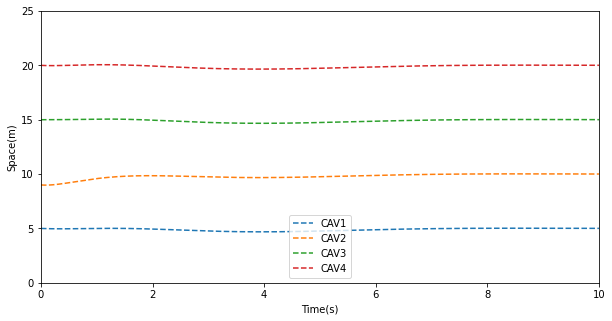

In [620]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.plot([t * step for t in range(int(times / step) + 1)], [l[1][0] - t[1][i][0] for t, l in zip(x_list, xL_list)],
             '--')
plt.xlim((0, 10))
plt.ylim((0, 25))
plt.xlabel("Time(s)")
plt.ylabel("Space(m)")
plt.legend(["CAV1", "CAV2", "CAV3", "CAV4"])
plt.show()

ValueError: x and y must have same first dimension, but have shapes (10001,) and (20001,)

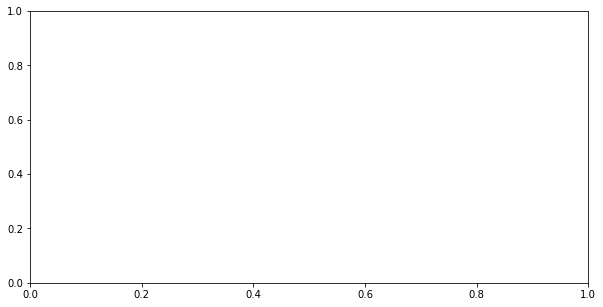

In [659]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.plot([t * step for t in range(int(times / step) + 1)], [t[0][i][0] for t in temp_list], '-')
plt.xlim((0, 10))
plt.ylim((-4, 10))
plt.xlabel("Time(s)")
plt.ylabel("Control")
plt.legend(["CAV1", "CAV2", "CAV3", "CAV4"])
plt.show()

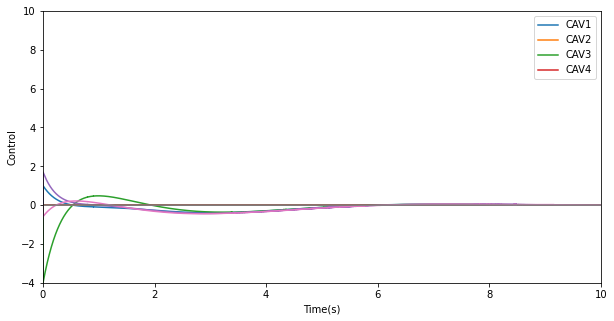

In [622]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.plot([t * step for t in range(int(times / step) + 1)], [t[1][i][0] for t in temp_list], '-')
plt.xlim((0, 10))
plt.ylim((-4, 10))
plt.xlabel("Time(s)")
plt.ylabel("Control")
plt.legend(["CAV1", "CAV2", "CAV3", "CAV4"])
plt.show()

In [623]:
s_mat = np.ones((2, 4))
s_mat[0][3] = 0
s_mat[1][2] = 0
s_mat[1][0] = 0
s_mat[1][2] = 0
# 主编队
for i in range(1, 4):
    s_sum = 0
    for j in range(0, i):
        s_sum += s_mat[0][j]
    if s_mat[0][i]:
        r_mat[0][i] = s_sum * r_mat[0][i] / (i + 1) + r_mat[0][i]
    else:
        r_mat[0][i] = (s_sum - 1) * r_mat[0][i] / (i + 1) + r_mat[0][i]
# 附编队
for i in range(0, 4):
    if r_mat[0][i][0] >= r_mat[1][i][0]:
        r_mat[1][i] = r_mat[1][i] / (i + 1) + r_mat[0][i]
print(r_mat)

[[[ 5.  0.]
  [15.  0.]
  [25.  0.]
  [30.  0.]]

 [[10.  0.]
  [20.  0.]
  [30.  0.]
  [35.  0.]]]


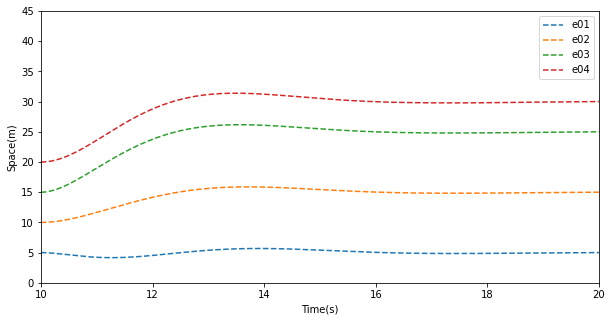

In [640]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.plot([t * step for t in range(int(times / step)*2 + 1)], [l[0][0] - t[0][i][0] for t, l in zip(x_list, xL_list)],
             '--')
plt.xlim((10, 20))
plt.ylim((0, 45))
plt.xlabel("Time(s)")
plt.ylabel("Space(m)")
plt.legend(["e01", "e02", "e03", "e04"])
plt.show()

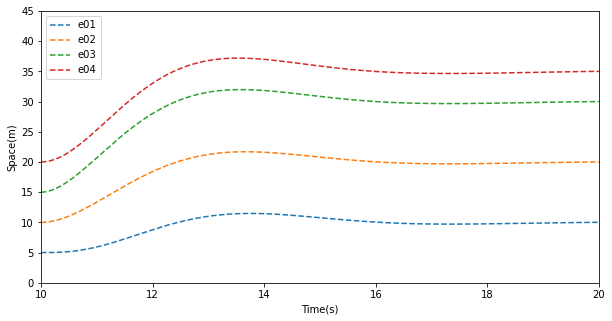

In [641]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.plot([t * step for t in range(int(times / step)*2 + 1)], [l[1][0] - t[1][i][0] for t, l in zip(x_list, xL_list)],
             '--')
plt.xlim((10, 20))
plt.ylim((0, 45))
plt.xlabel("Time(s)")
plt.ylabel("Space(m)")
plt.legend(["e01", "e02", "e03", "e04"])
plt.show()

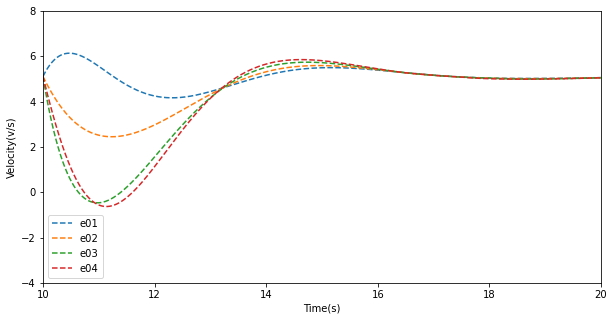

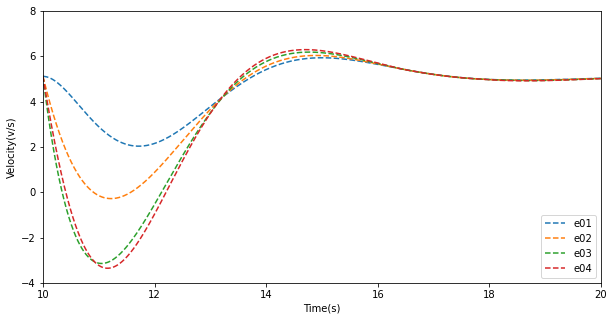

In [639]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.plot([t * step for t in range(int(times / step)*2 + 1)], [t[0][i][0] for t in v_list], '--')
plt.ylim((-4, 8))
plt.xlim((10, 20))
plt.xlabel("Time(s)")
plt.ylabel("Velocity(v/s)")
plt.legend(["e01", "e02", "e03", "e04"])
plt.show()
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.plot([t * step for t in range(int(times / step)*2 + 1)], [t[1][i][0] for t in v_list], '--')
plt.ylim((-4, 8))
plt.xlim((10, 20))
plt.xlabel("Time(s)")
plt.ylabel("Velocity(v/s)")
plt.legend(["e01", "e02", "e03", "e04"])
plt.show()

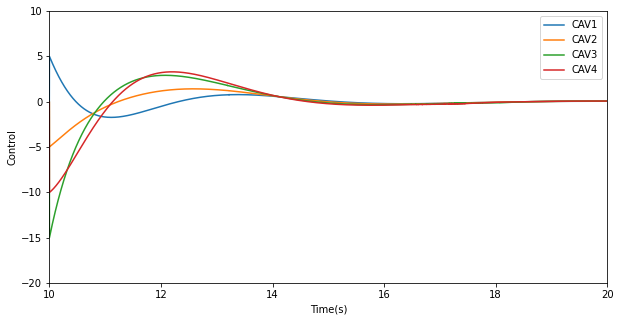

In [657]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.plot([t * step for t in range(int(times / step)*2 + 1)], [t[0][i][0] for t in temp_list], '-')
plt.xlim((10,20))
plt.ylim((-20, 10))
plt.xlabel("Time(s)")
plt.ylabel("Control")
plt.legend(["CAV1", "CAV2", "CAV3", "CAV4"])
plt.show()

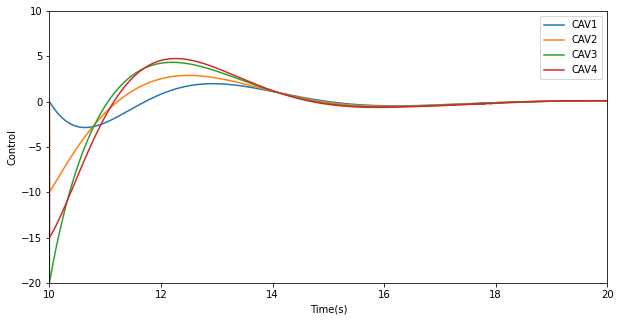

In [658]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.plot([t * step for t in range(int(times / step)*2 + 1)], [t[1][i][0] for t in temp_list], '-')
plt.xlim((10,20))
plt.ylim((-20, 10))
plt.xlabel("Time(s)")
plt.ylabel("Control")
plt.legend(["CAV1", "CAV2", "CAV3", "CAV4"])
plt.show()

In [660]:
xL_list[-1]

array([[125.       ,   1.       ],
       [124.9999999,   3.       ]])

In [661]:
vL_list[-1]

array([[5.1      , 0.       ],
       [5.1000001, 0.       ]])

In [662]:
x_list[-1]

array([[[119.99647456,   1.        ],
        [109.99829432,   1.        ],
        [ 99.99960152,   1.        ],
        [ 94.99825437,   1.        ]],

       [[114.98775328,   3.        ],
        [104.99087679,   3.        ],
        [ 94.99409499,   3.        ],
        [ 89.99442962,   3.        ]]])

In [663]:
v_list[-1]

array([[[5.05909774, 0.        ],
        [5.05580659, 0.        ],
        [5.0503142 , 0.        ],
        [5.04951587, 0.        ]],

       [[5.03159733, 0.        ],
        [5.02662874, 0.        ],
        [5.01834985, 0.        ],
        [5.0147667 , 0.        ]]])

In [664]:
r_mat

array([[[ 5.,  0.],
        [15.,  0.],
        [25.,  0.],
        [30.,  0.]],

       [[10.,  0.],
        [20.,  0.],
        [30.,  0.],
        [35.,  0.]]])

In [665]:
a_mat

array([[0., 1., 0., 0.],
       [1., 0., 1., 0.],
       [0., 1., 0., 1.],
       [0., 0., 1., 0.]])